<a href="https://colab.research.google.com/github/gtimokhina/homework_0-directory/blob/master/end_to_end_ml_project_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Common imports

In [0]:
import sklearn
import numpy as np
import os

###For plotting figures

In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

###Save the figures

In [0]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project_example"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

###Get the wine data

In [84]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###Summary statistics

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [86]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [87]:
df.shape

(1599, 12)

Saving figure attribute_histogram_plots


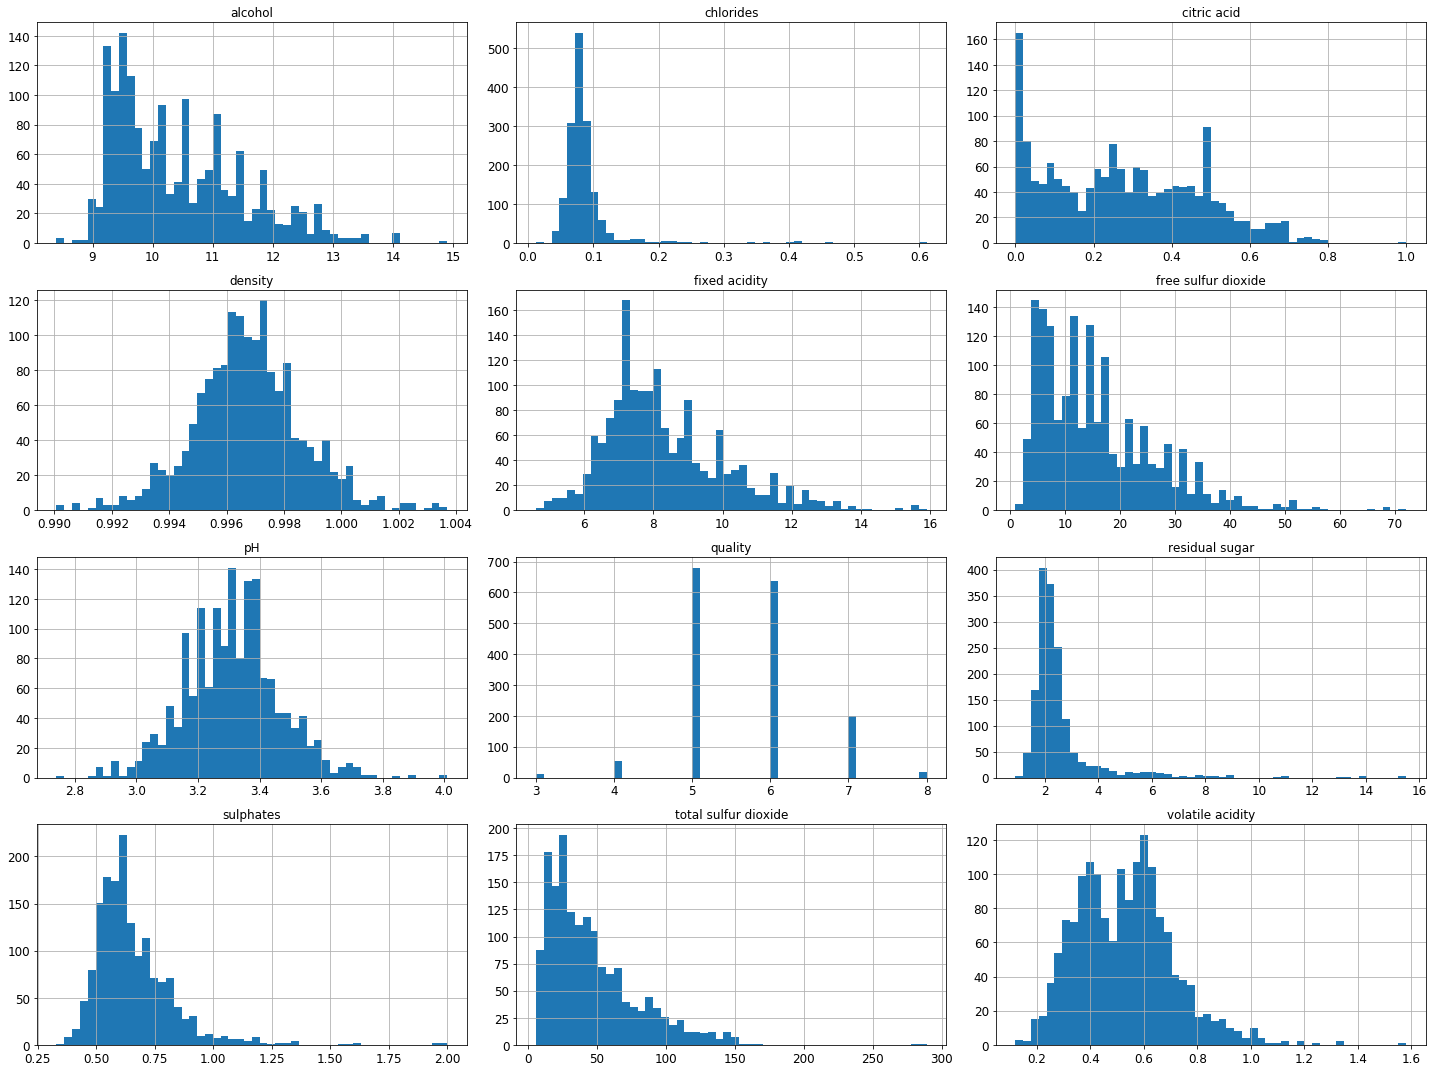

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

###Make output identical at every run

In [0]:
np.random.seed(42)

###Separate our target (y) features from our input (X) features

In [0]:
y = df['quality']


###Split data into train and test sets

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42, stratify=y)

In [92]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1542,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,6
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,5
344,11.9,0.570,0.50,2.6,0.082,6.0,32.0,1.00060,3.12,0.78,10.70,6
924,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.20,5
971,10.4,0.260,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.90,6


###Explore target variable and check if train set is stratified

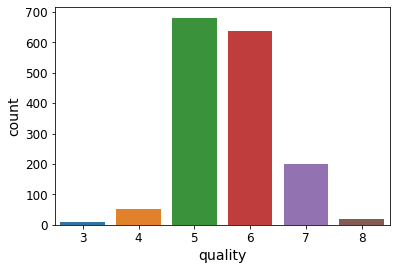

In [93]:
import seaborn as sns
sns.countplot(x = 'quality', data = df)

###Check our stratification

In [94]:
X_train['quality'].value_counts() / len(X_train['quality'])

5    0.426114
6    0.398749
7    0.124316
4    0.032838
8    0.011728
3    0.006255
Name: quality, dtype: float64

In [95]:
df['quality'].value_counts() / len(df['quality'])

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

###Explore data

####work on train set only

In [0]:
df =  X_train


######check correlation 

In [97]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.481197
sulphates               0.228050
citric acid             0.210802
fixed acidity           0.107940
residual sugar          0.003710
free sulfur dioxide    -0.048291
pH                     -0.052063
chlorides              -0.120231
density                -0.193009
total sulfur dioxide   -0.194511
volatile acidity       -0.383249
Name: quality, dtype: float64

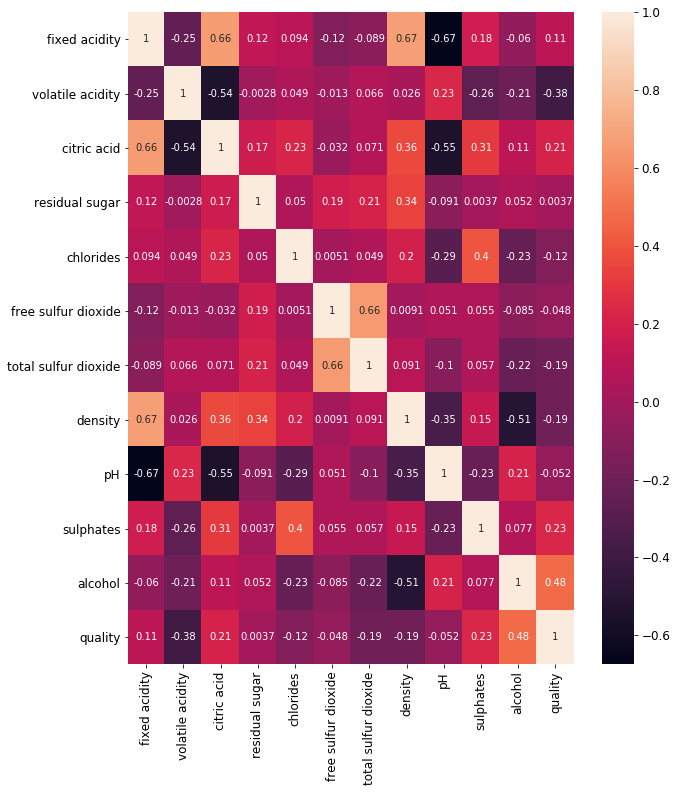

In [98]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(), annot = True)

####check non linear correlation also

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39fdf4c940>,
      dtype=object)

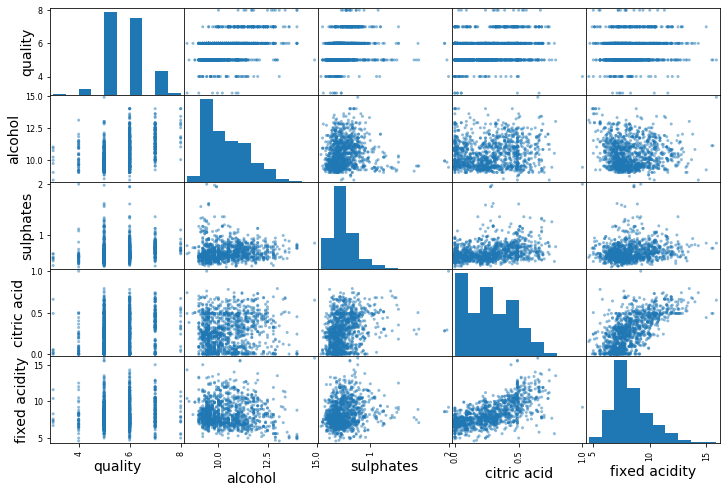

In [99]:
from pandas.plotting import scatter_matrix
attributes = ["quality", "alcohol", "sulphates",
              "citric acid","fixed acidity"]
scatter_matrix(df[attributes], figsize=(12, 8))


###Check correlation between fixed acidity and pH. Can see negative correlation

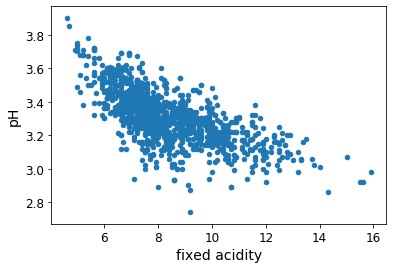

In [100]:
df.plot(kind="scatter", x="fixed acidity", y="pH")


###We can see negative correlation between fixed acidity and citric acid. Positive correlation

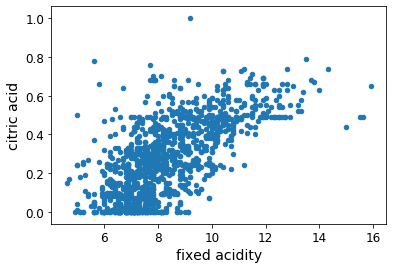

In [101]:
df.plot(kind="scatter", x="fixed acidity", y="citric acid")

###Prepare data for ML algorithm. Pipeline for preprocessing the numerical attributes. Scale numerical features via StandardScaler

In [0]:
wine = df.drop("quality", axis=1)
wine_labels = df["quality"].copy()

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([('std_scaler', StandardScaler())])

In [0]:
wine_prepared = pipeline.fit_transform(wine)

In [105]:
print(wine_prepared)

[[-0.94797009  1.84038456 -1.30310213 ... -0.05665069 -0.58149257
   0.30561112]
 [-0.8299525   0.57378326  0.28806218 ... -0.58456494 -0.58149257
  -0.86781667]
 [ 2.12048734  0.23602292  1.16063616 ... -1.24445776  0.65244695
   0.258674  ]
 ...
 [-0.29887333 -0.55208456  0.2367343  ...  0.00933859 -0.13278729
  -0.11682289]
 [ 1.70742577 -0.15803082  2.3925053  ... -0.58456494 -0.24496361
   0.72804512]
 [ 0.23220584 -0.60837795  0.90399675 ...  0.14131716  0.59635879
   1.4790389 ]]


###Select and train the model

In [106]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_prepared, wine_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Try the full preprocessing pipeline on a few training instances


In [107]:
some_data = wine[:7]
some_labels = wine_labels.iloc[:7]
some_data_prepared = pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [5.50831104 5.04077727 5.83997956 6.23194851 6.29442697 6.17413046
 4.80350849]


In [108]:
print("Labels:", list(some_labels))

Labels: [6, 5, 6, 5, 6, 6, 5]


In [109]:
from sklearn.metrics import mean_squared_error

wine_predictions = lin_reg.predict(wine_prepared)
lin_mse = mean_squared_error(wine_labels, wine_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6485808399930018

In [110]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(wine_labels, wine_predictions)
lin_mae

0.5032413405288211

###Try another model:  DecisionTreeRegressor

In [111]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(wine_prepared, wine_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

####Evaluate on training set

In [112]:
wine_predictions = tree_reg.predict(wine_prepared)
tree_mse = mean_squared_error(wine_labels, wine_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

###Is it overfitting?????  Let's check

###Use Cross validation for better evaluation

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, wine_prepared, wine_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [114]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.81967982 0.81967982 0.78561282 0.73950997 0.6846532  0.73950997
 0.79549513 0.81967982 0.8882919  1.04240787]
Mean: 0.8134520309227424
Standard deviation: 0.09314483727239112


####check the same results for Linear Regression

In [115]:
lin_scores = cross_val_score(lin_reg, wine_prepared, wine_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.75076319 0.66556923 0.61889211 0.63377189 0.54486361 0.61092243
 0.57606298 0.70839288 0.71875804 0.71041215]
Mean: 0.6538408517717568
Standard deviation: 0.06427563898227308


######looks like Linear Regression is better than Decision tree regressor

##Try another Model Random Forest

In [116]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(wine_prepared, wine_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [117]:
wine_predictions = forest_reg.predict(wine_prepared)
forest_mse = mean_squared_error(wine_labels, wine_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.215551368574027

####check cross validation scores

In [118]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, wine_prepared, wine_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.62097517 0.64460562 0.53551523 0.56953037 0.47434659 0.55100406
 0.52027261 0.6325951  0.66051117 0.68562805]
Mean: 0.5894983968410934
Standard deviation: 0.06558620986111337


##Fine-Tune Your Model

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(wine_prepared, wine_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [120]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [121]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

#####check evaluation scores:

In [122]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.7244274089279755 {'max_features': 2, 'n_estimators': 3}
0.6252646253512878 {'max_features': 2, 'n_estimators': 10}
0.6004639920252957 {'max_features': 2, 'n_estimators': 30}
0.6847223050815948 {'max_features': 4, 'n_estimators': 3}
0.617261802117174 {'max_features': 4, 'n_estimators': 10}
0.5975804604625049 {'max_features': 4, 'n_estimators': 30}
0.7055481575444578 {'max_features': 6, 'n_estimators': 3}
0.6272712652402295 {'max_features': 6, 'n_estimators': 10}
0.609764075416751 {'max_features': 6, 'n_estimators': 30}
0.704500153077538 {'max_features': 8, 'n_estimators': 3}
0.6210285832596517 {'max_features': 8, 'n_estimators': 10}
0.6026461145022166 {'max_features': 8, 'n_estimators': 30}
0.6828591631590218 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.6212988450833953 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.6815465640396468 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.6260379616379224 {'bootstrap': False, 'max_features': 3, 'n_es

###Analize best Models and their errors

In [123]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.06171885, 0.1258134 , 0.06104195, 0.0503921 , 0.0659481 ,
       0.04985296, 0.07970418, 0.09420708, 0.06812741, 0.14147482,
       0.20171915])

##Evaluate System on test set

In [124]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.06171885, 0.1258134 , 0.06104195, 0.0503921 , 0.0659481 ,
       0.04985296, 0.07970418, 0.09420708, 0.06812741, 0.14147482,
       0.20171915])

In [125]:
sorted(zip(feature_importances, list(X_train)), reverse=True)

[(0.2017191453083905, 'alcohol'),
 (0.14147482249254803, 'sulphates'),
 (0.1258133970389944, 'volatile acidity'),
 (0.09420708146925548, 'density'),
 (0.07970417644453166, 'total sulfur dioxide'),
 (0.06812740585406386, 'pH'),
 (0.06594810034686711, 'chlorides'),
 (0.061718852408944064, 'fixed acidity'),
 (0.06104195462321271, 'citric acid'),
 (0.05039210000312549, 'residual sugar'),
 (0.049852964010066586, 'free sulfur dioxide')]

####looks like alcohol is the main feature

###Final Model

In [0]:
final_model = grid_search.best_estimator_

y_test = X_test["quality"].copy()
X_test = X_test.drop("quality", axis=1)



In [130]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
963,8.8,0.27,0.39,2.0,0.100,20.0,27.0,0.99546,3.15,0.69,11.2
475,9.6,0.68,0.24,2.2,0.087,5.0,28.0,0.99880,3.14,0.60,10.2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
329,10.7,0.46,0.39,2.0,0.061,7.0,15.0,0.99810,3.18,0.62,9.5
149,8.2,0.40,0.44,2.8,0.089,11.0,43.0,0.99750,3.53,0.61,10.5


In [0]:
X_test_prepared = pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)  

In [134]:
final_rmse

0.5714200148168888

###Compute 95% confidence interval 

In [135]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.50332125, 0.63222574])